In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

## 폰트 관련

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../fonts/NanumGothic/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

# 서울시 버스노선별 정류장별 승하차 인원 정보.csv

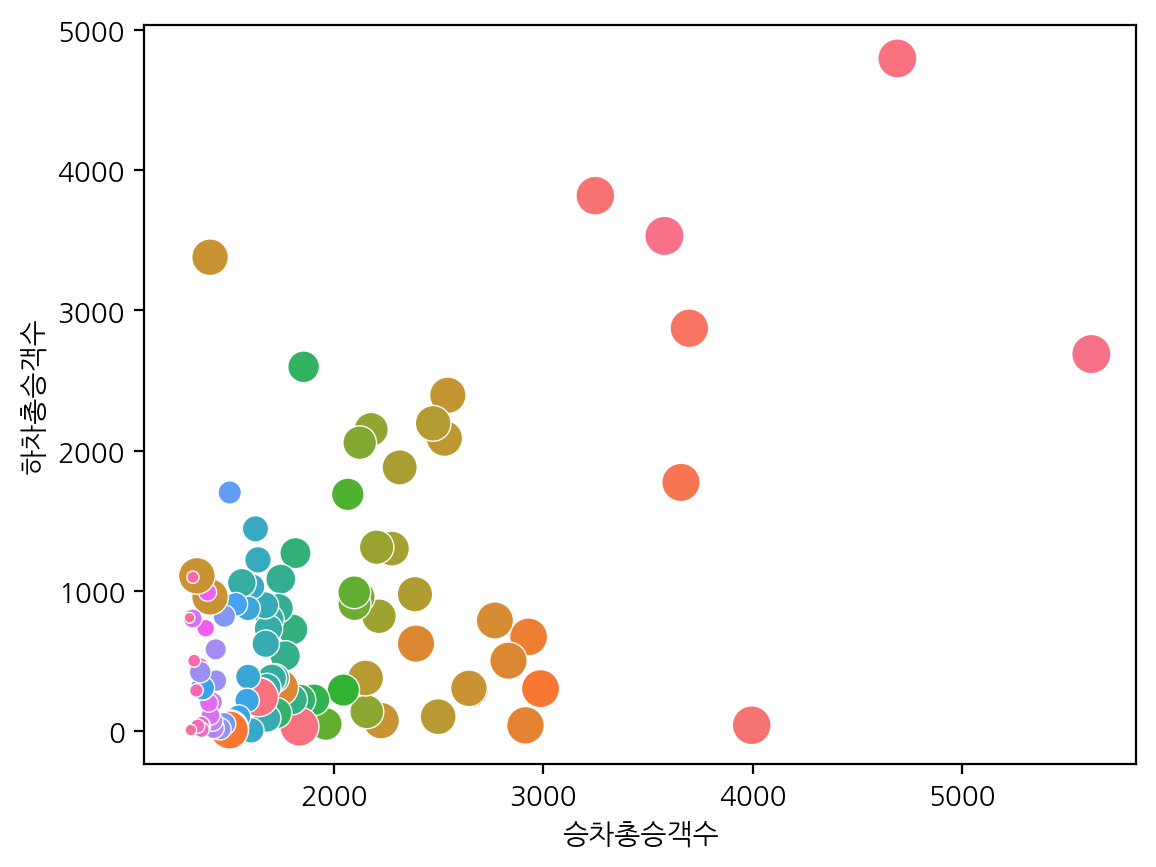

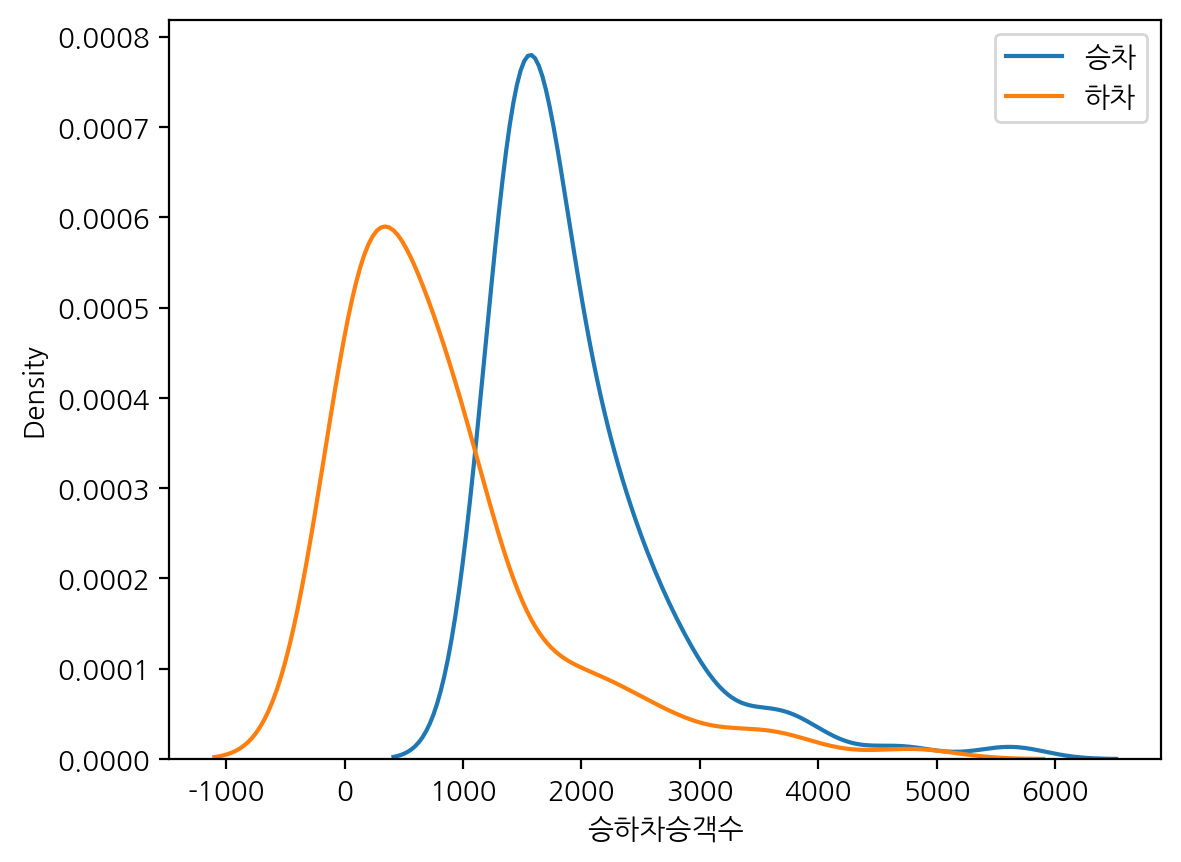

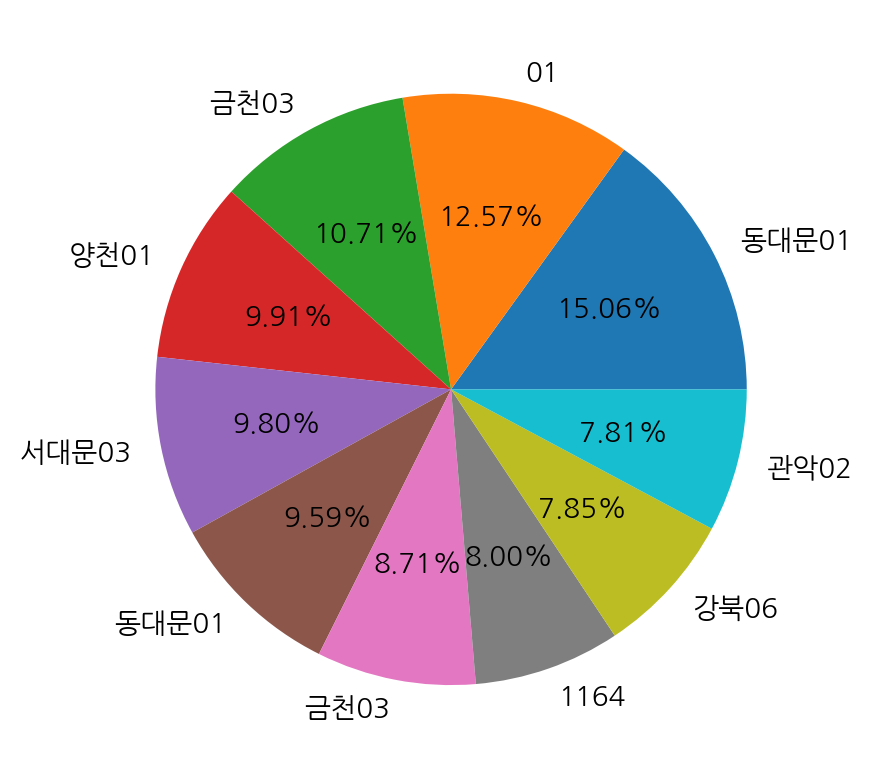

In [6]:
with open("../large-datasets/서울시 버스노선별 정류장별 승하차 인원 정보.csv",
          encoding="cp949") as f:
    data = pd.read_csv(f)

trimmed = data.drop(columns=['사용일자', '노선명', '버스정류장ARS번호']).sort_values(
    by='승차총승객수')[::-1].drop_duplicates(subset=['표준버스정류장ID']).head(100)

sns.scatterplot(trimmed,
                x='승차총승객수',
                y='하차총승객수',
                size='노선번호',
                hue='노선번호',
                sizes=(15, 200),
                legend=False)
plt.show()

sns.kdeplot(data=trimmed['승차총승객수'], label='승차')
sns.kdeplot(data=trimmed['하차총승객수'], label='하차')
plt.xlabel("승하차승객수")
plt.legend()
plt.show()

plt.pie(trimmed.head(10)['승차총승객수'], labels=trimmed.head(10)['노선번호'], autopct="%.2f%%")
plt.show()